<a href="https://colab.research.google.com/github/rbtirumala/workexamples-python/blob/master/vision37productpredictmlmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tensor Flow AI Model to help Predict Product Re-ordering in Convenience Store Aisles/Shelf**



In [ ]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.8.0


 **Create Features (time) for ML modeling products sold in C-store - time series**

In [ ]:
import numpy as np
X= np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
print (X)
len(X)


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


24

**Create Labels for candy count**


In [ ]:
y = np.array([36,34,34,30,28,27,24,22,19,19,18,16,15,14,12,11,9,8,8,6,5,4,2,2])
print(len(y))


24


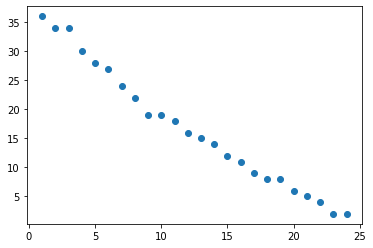

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

**Turning Numpy arrays into Tensors so we can use tensorflow**

In [ ]:
# Turning numpy array into Tensors
X = tf.constant(X)
y = tf.constant(y)
X, y


(<tf.Tensor: shape=(24,), dtype=int64, numpy=
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24])>,
 <tf.Tensor: shape=(24,), dtype=int64, numpy=
 array([36, 34, 34, 30, 28, 27, 24, 22, 19, 19, 18, 16, 15, 14, 12, 11,  9,
         8,  8,  6,  5,  4,  2,  2])>)

In [ ]:
X_train = X[:18]
X_test = X[18:]
X_train, X_test

(<tf.Tensor: shape=(18,), dtype=int64, numpy=
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18])>,
 <tf.Tensor: shape=(6,), dtype=int64, numpy=array([19, 20, 21, 22, 23, 24])>)

In [ ]:
y_train = y[:18]
y_test =  y[18:]
y_train, y_test

(<tf.Tensor: shape=(18,), dtype=int64, numpy=
 array([36, 34, 34, 30, 28, 27, 24, 22, 19, 19, 18, 16, 15, 14, 12, 11,  9,
         8])>,
 <tf.Tensor: shape=(6,), dtype=int64, numpy=array([8, 6, 5, 4, 2, 2])>)

**Create a tensorflow machine learning using regression neural networks model**

In [ ]:
# Set random seed
tf.random.set_seed(42)

In [ ]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(100,activation = 'relu'),
        tf.keras.layers.Dense(100,activation = 'relu'),
        tf.keras.layers.Dense(100,activation = 'relu'),
        tf.keras.layers.Dense(100,activation = 'relu'),
        tf.keras.layers.Dense(100,activation = 'relu'),
        tf.keras.layers.Dense(1)])

**Compiling the model**

In [ ]:
model.compile(loss = tf.keras.losses.mae, 
              optimizer = tf.keras.optimizers.Adam(lr=0.0001),
              metrics =["mse"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


**Fit the model**

In [ ]:
# Fit model (this time we'll train for longer)
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=200) # train for 100 epochs not 10

Epoch 1/200
1/1 [==============================] - 1s 545ms/step - loss: 3.0119 - mse: 11.7608
Epoch 2/200
1/1 [==============================] - 0s 23ms/step - loss: 2.9571 - mse: 11.3173
Epoch 3/200
1/1 [==============================] - 0s 15ms/step - loss: 2.9020 - mse: 10.9001
Epoch 4/200
1/1 [==============================] - 0s 10ms/step - loss: 2.8467 - mse: 10.5093
Epoch 5/200
1/1 [==============================] - 0s 10ms/step - loss: 2.7917 - mse: 10.1495
Epoch 6/200
1/1 [==============================] - 0s 11ms/step - loss: 2.7362 - mse: 9.8151
Epoch 7/200
1/1 [==============================] - 0s 11ms/step - loss: 2.6803 - mse: 9.5070
Epoch 8/200
1/1 [==============================] - 0s 11ms/step - loss: 2.6240 - mse: 9.2274
Epoch 9/200
1/1 [==============================] - 0s 14ms/step - loss: 2.5762 - mse: 8.9780
Epoch 10/200
1/1 [==============================] - 0s 20ms/step - loss: 2.5322 - mse: 8.7347
Epoch 11/200
1/1 [==============================] - 0s 10ms/ste

In [ ]:
X_train, y_train

(<tf.Tensor: shape=(18,), dtype=int64, numpy=
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18])>, <tf.Tensor: shape=(18,), dtype=int64, numpy=
 array([36, 34, 34, 30, 28, 27, 24, 22, 19, 19, 18, 16, 15, 14, 12, 11,  9,
         8])>)

In [ ]:
# Try and predict what y would be if X was 17.0
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 100)               200       
                                                                 
 dense_49 (Dense)            (None, 100)               10100     
                                                                 
 dense_50 (Dense)            (None, 100)               10100     
                                                                 
 dense_51 (Dense)            (None, 100)               10100     
                                                                 
 dense_52 (Dense)            (None, 100)               10100     
                                                                 
 dense_53 (Dense)            (None, 1)                 101       
                                                                 
Total params: 40,701
Trainable params: 40,701
Non-trai

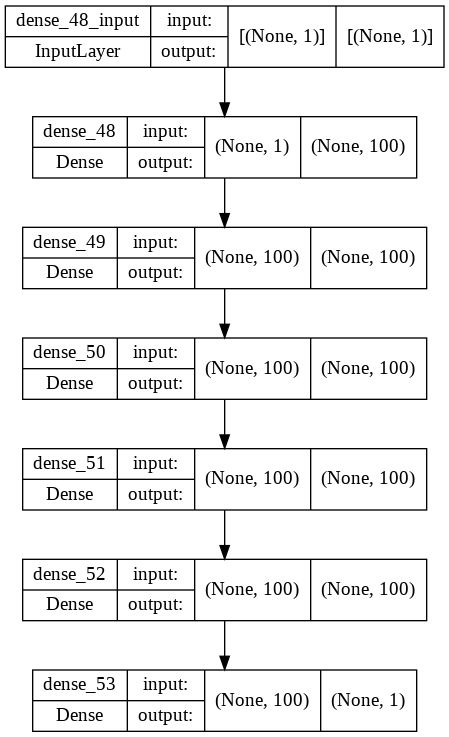

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

In [ ]:
# Make predictions
y_preds = model.predict(X_test)
X_test, y_test, y_preds

(<tf.Tensor: shape=(6,), dtype=int64, numpy=array([19, 20, 21, 22, 23, 24])>,
 <tf.Tensor: shape=(6,), dtype=int64, numpy=array([8, 6, 5, 4, 2, 2])>,
 array([[7.3097577],
        [6.8616877],
        [6.4599915],
        [6.0937963],
        [5.74315  ],
        [5.4225454]], dtype=float32))

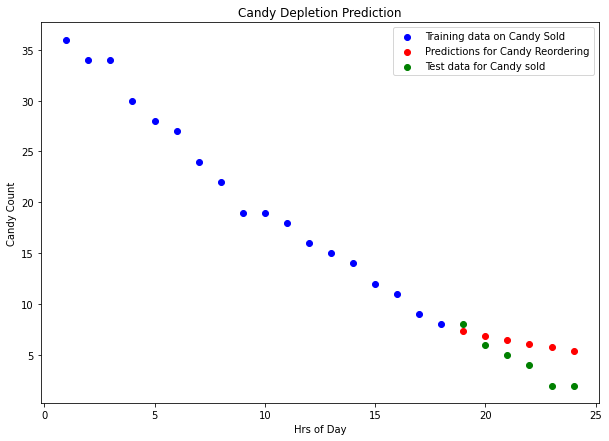

In [ ]:
plt.figure(figsize=(10, 7))
plt.title('Candy Depletion Prediction')
plt.xlabel('Hrs of Day')
plt.ylabel('Candy Count')

# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data on Candy Sold')
# Plot test data in green
plt.scatter(X_test, y_preds,c='r', label='Predictions for Candy Reordering')
plt.scatter(X_test, y_test, c='g', label = 'Test data for Candy sold')
# Show the legend
plt.legend();